In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [44]:
#loading the static link data
unique_links= pd.read_csv('../static/unique_links.csv')
unique_links

,start_stop,end_stop,start_sequence,end_sequence,length,mean_speed [km/h],covariance_speed [%],buffer_speed [km/h],mean_time [mins],covariance_time [%],buffer_time [mins],mean_headway [mins],covariance_headway [%],buffer_headway [mins]
0,PF_A15_C,PF_A14_C,1,2,2.6710,40.065000,1.774532e-16,0.0,4.0,0.0,0.0,13.954708,5.889077,9.00
1,PF_A14_C,PF_A13_C,2,3,2.1048,42.096000,1.688916e-16,0.0,3.0,0.0,0.0,13.954708,5.889077,9.00
2,PF_A13_C,PF_A12_C,3,4,1.0988,32.964000,0.000000e+00,0.0,2.0,0.0,0.0,13.954708,5.889077,9.00
3,PF_A12_C,PF_A11_C,4,5,1.4536,29.072000,0.000000e+00,0.0,3.0,0.0,0.0,13.954708,5.889077,9.00
4,PF_A11_C,PF_A10_C,5,6,2.1612,32.418000,2.193121e-16,0.0,4.0,0.0,0.0,13.954708,5.889077,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,PF_N11_C,PF_N10_C,2,3,2.8733,34.479600,0.000000e+00,0.0,5.0,0.0,0.0,40.306034,3.493899,41.85
198,PF_N10_C,PF_N09_C,3,4,2.0799,31.198628,4.425913e-05,0.0,4.0,0.0,0.0,40.306034,3.493899,41.85
199,PF_N09_C,PF_N08_C,4,5,1.7224,34.447983,5.344577e-06,0.0,3.0,0.0,0.0,40.306034,3.493899,41.85
200,PF_N08_C,PF_N07_C,5,6,1.3477,26.954000,5.260984e-16,0.0,3.0,0.0,0.0,41.942149,3.397802,48.00


In [45]:
# read data
data = pd.read_csv('../output-single/link_kpis_total_15min_intervals.csv')
# convert to datetime and set as index
data.set_index('datetime', inplace=True)
data.index = pd.to_datetime(data.index)
data

,Unnamed: 0,start_stop,end_stop,weighted_avg_headway,weighted_avg_speed,weighted_avg_time,no_of_trips
datetime,,,,,,,
2024-01-29 10:00:00,0,PF_A01_1,PF_B01_1,12.408333,14.722512,1.414783,115.0
2024-01-29 10:15:00,1,PF_A01_1,PF_B01_1,10.592529,14.511484,1.426754,190.0
2024-01-29 10:30:00,2,PF_A01_1,PF_B01_1,11.185676,14.434930,1.437135,228.0
2024-01-29 10:45:00,3,PF_A01_1,PF_B01_1,13.865204,14.637638,1.423482,269.0
2024-01-29 11:00:00,4,PF_A01_1,PF_B01_1,10.505591,14.554157,1.429492,295.0
...,...,...,...,...,...,...,...
2024-03-25 04:15:00,863193,PF_N12_C,PF_N11_C,39.103261,22.816955,11.991667,46.0
2024-03-25 04:30:00,863194,PF_N12_C,PF_N11_C,23.964035,15.449527,11.529825,19.0
2024-03-25 05:00:00,863195,PF_N12_C,PF_N11_C,15.416667,6.409373,18.350000,1.0


In [46]:
# filtering for specific link
startStop = 'PF_A15_C'
endStop = 'PF_A14_C'

linkData = data[(data['start_stop'] == startStop) & (data['end_stop'] == endStop)]
staticLinkData = unique_links[(unique_links['start_stop'] == startStop) & (unique_links['end_stop'] == endStop)]

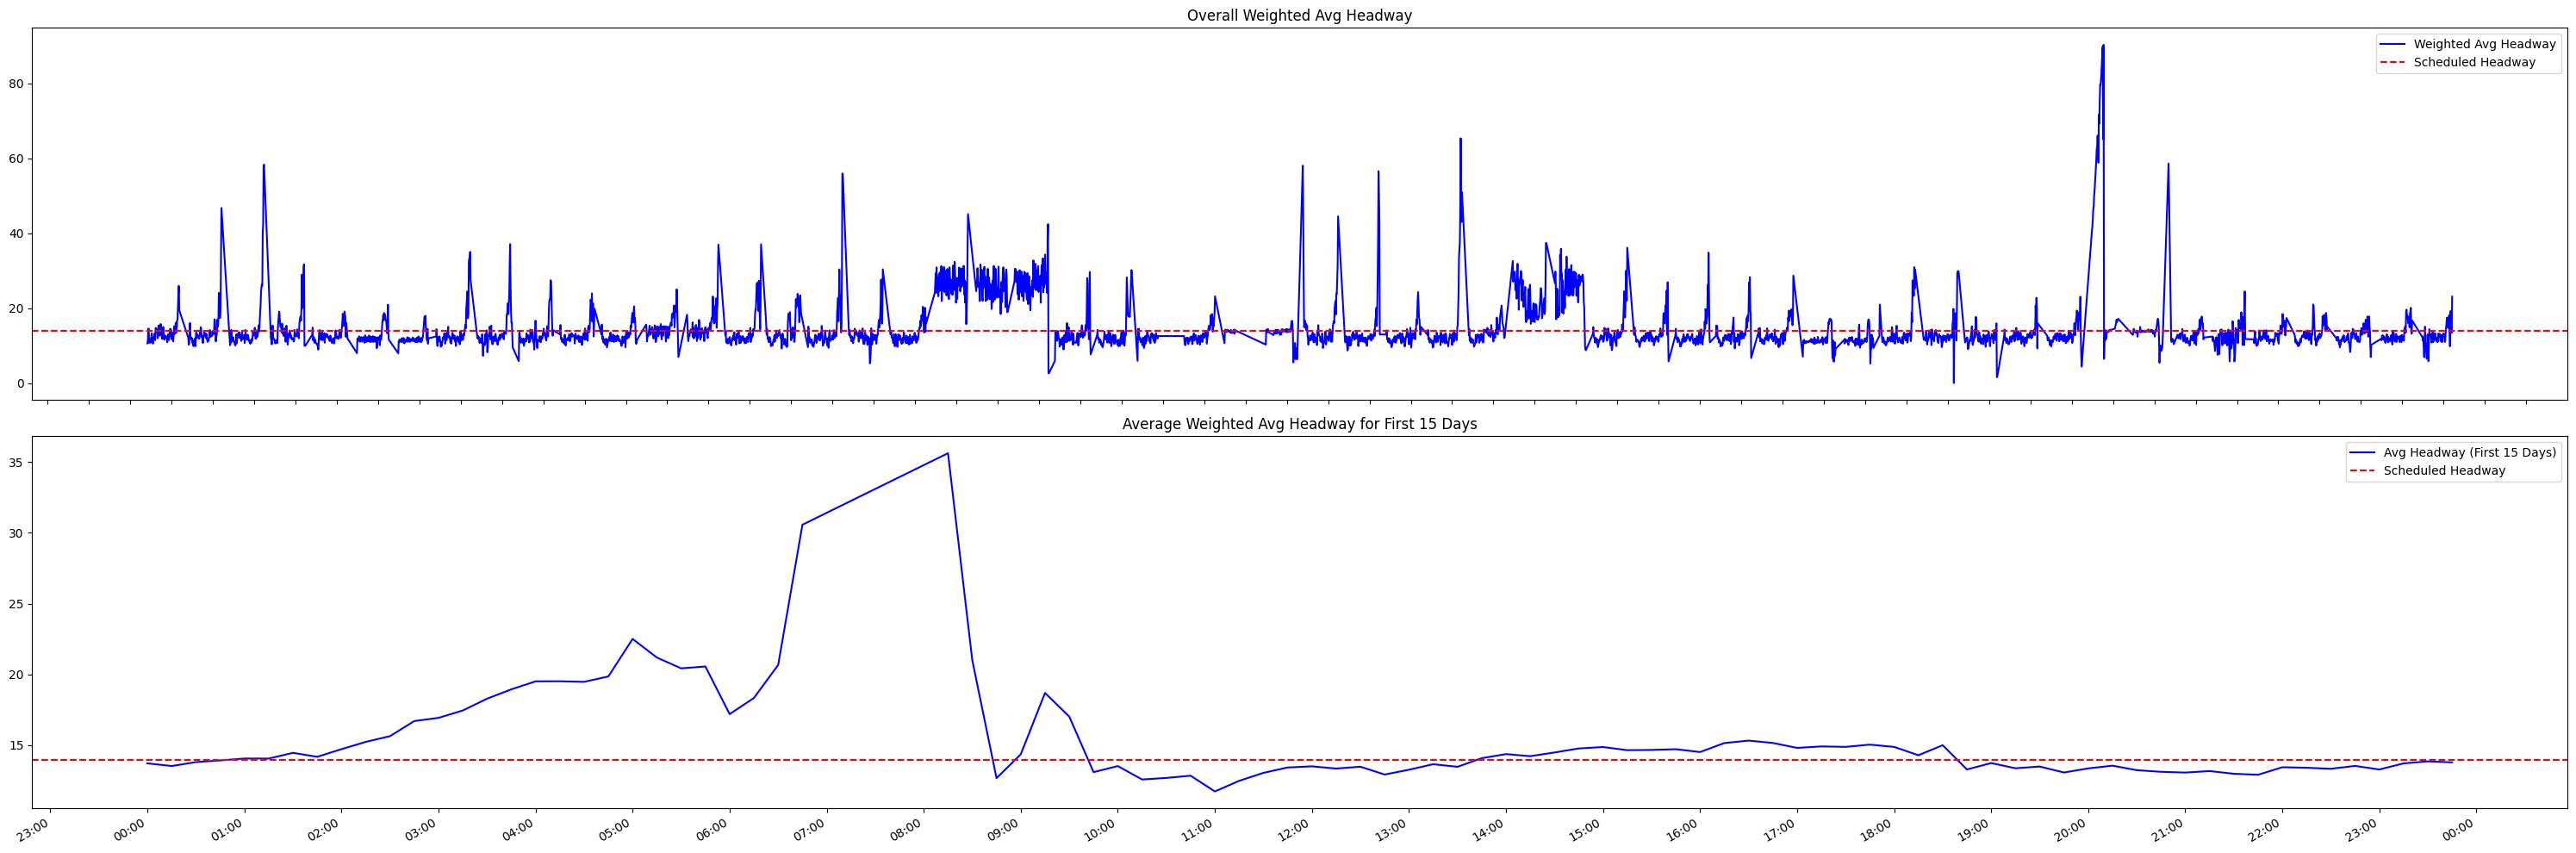

In [52]:
# extracting the sorted unique days from the linkData index
unique_days = linkData.index.normalize().unique()

# Get the first 15 days
first_15_days = unique_days[:]

# Filter data for first 15 days
mask = np.isin(linkData.index.date, [d.date() for d in first_15_days])
first_15_days_data = linkData[mask]

# Extract time of day for grouping
first_15_days_data = first_15_days_data.copy()
first_15_days_data['time_of_day'] = first_15_days_data.index.time

# Group by time of day and calculate average headway
avg_by_time = first_15_days_data.groupby('time_of_day')['weighted_avg_headway'].mean()

# Create a datetime index for plotting (using an arbitrary base date)
base_date = pd.to_datetime('2000-01-01')
time_index = [base_date.replace(hour=t.hour, minute=t.minute, second=t.second) for t in avg_by_time.index]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(30, 10))

# Full data plot on ax1
ax1.plot(linkData.index, linkData['weighted_avg_headway'], color='blue', label='Weighted Avg Headway')
ax1.axhline(y=staticLinkData['mean_headway [mins]'].values[0], color='red', linestyle='--', label='Scheduled Headway')
ax1.legend()
ax1.set_title("Overall Weighted Avg Headway")
ax1.xaxis.set_major_locator(mdates.DayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# Averaged data plot on ax2
ax2.plot(time_index, avg_by_time.values, color='blue', label='Avg Headway (First 15 Days)')
ax2.axhline(y=staticLinkData['mean_headway [mins]'].values[0], color='red', linestyle='--', label='Scheduled Headway')
ax2.legend()
ax2.set_title("Average Weighted Avg Headway for First 15 Days")
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.show()


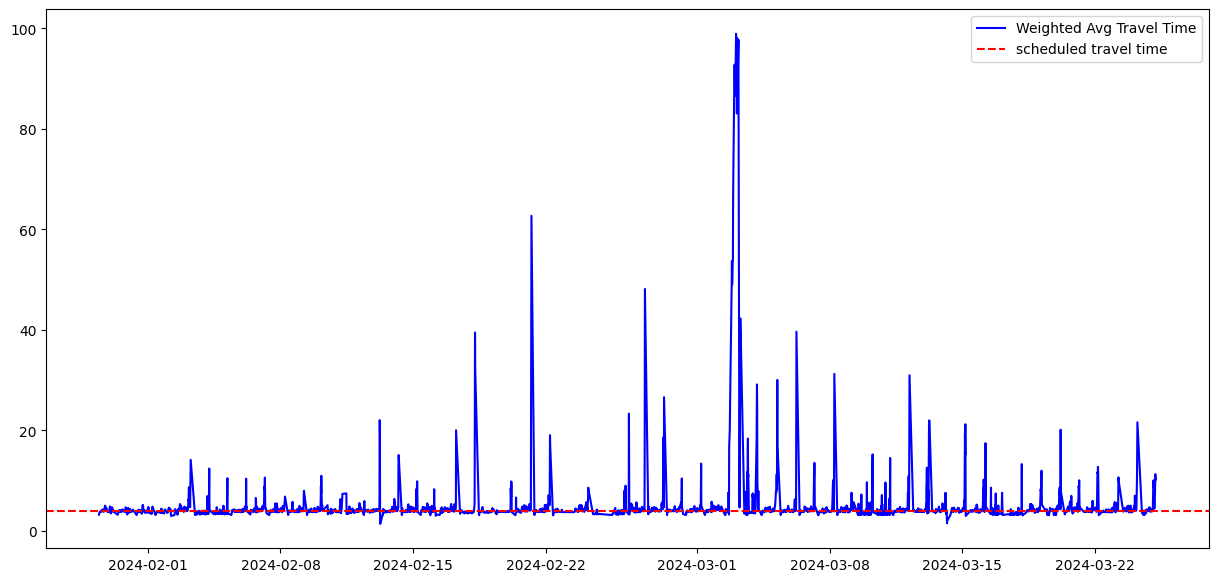

In [48]:
# plotting the time taken
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(linkData.index, linkData['weighted_avg_time'], color='blue', label='Weighted Avg Travel Time')
ax.axhline(y=staticLinkData['mean_time [mins]'].values[0], color='red', linestyle='--', label='scheduled travel time')
ax.legend()
plt.show()

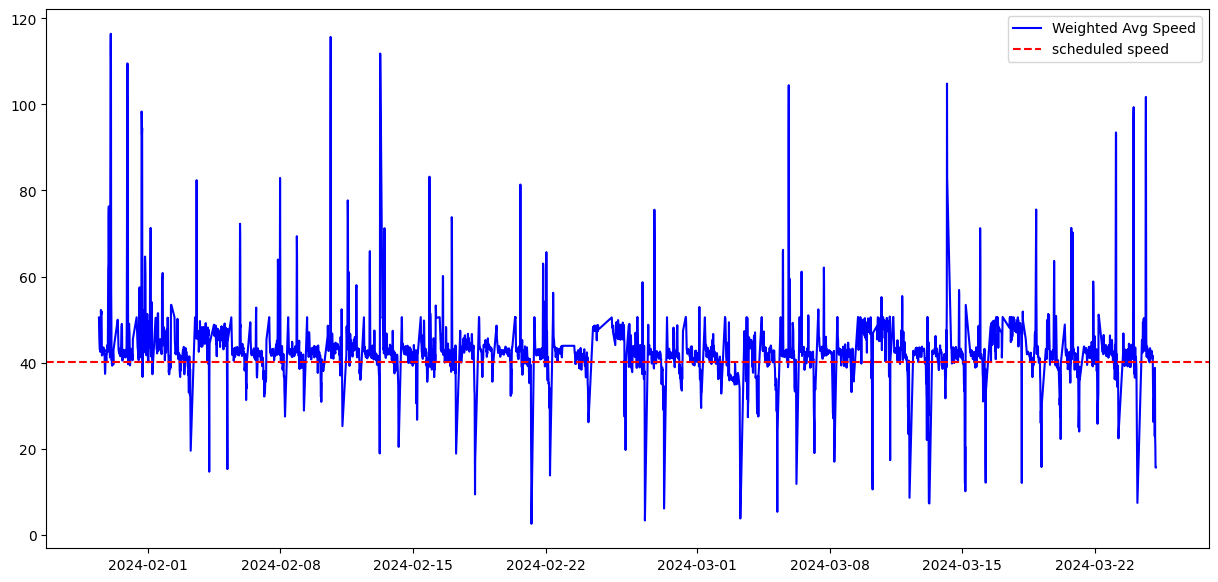

In [49]:
# plotting the speed
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(linkData.index, linkData['weighted_avg_speed'], color='blue', label='Weighted Avg Speed')
ax.axhline(y=staticLinkData['mean_speed [km/h]'].values[0], color='red', linestyle='--', label='scheduled speed')
ax.legend()
plt.show()